In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()

def filter_by_column(results, column, pattern):
    return results[results[column].str.contains(pattern)]

def filter_to_dataset(results, dataset_pattern):
    return filter_by_column(results, 'dataset', dataset_pattern)


# Import datasets

In [3]:
results_v1 = pd.read_csv('output-models/results_1.0.csv')
predictions_v1 = pd.read_csv('output-models/predictions_all_seasons_merged_mult_feature-selected_1.0.csv')

# Test RMSE For All (Compare datasets)

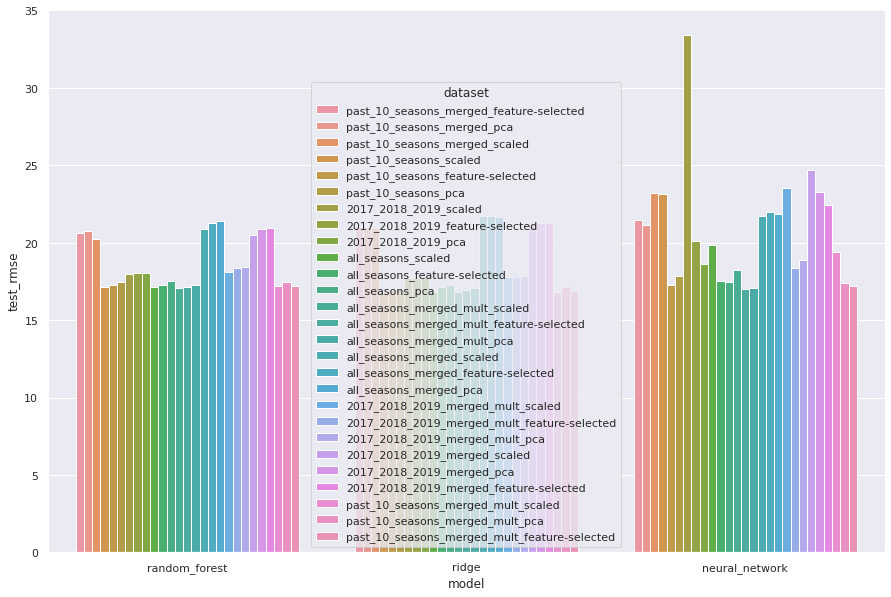

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="model", hue="dataset", y="test_rmse", data=results_v1, ax=ax)
plt.show()

# Test R^2 For All (Compare datasets)

<AxesSubplot:xlabel='model', ylabel='test_r_2'>

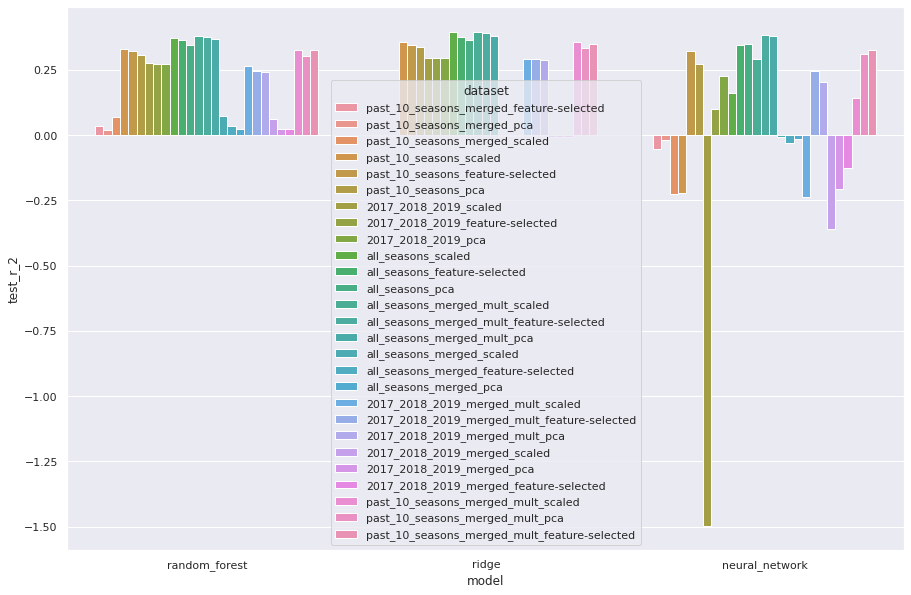

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="model", hue="dataset", y="test_r_2", data=results_v1, ax=ax)

# Comparing Datasets Across Ridge Regression (RMSE)

<AxesSubplot:xlabel='test_rmse', ylabel='dataset'>

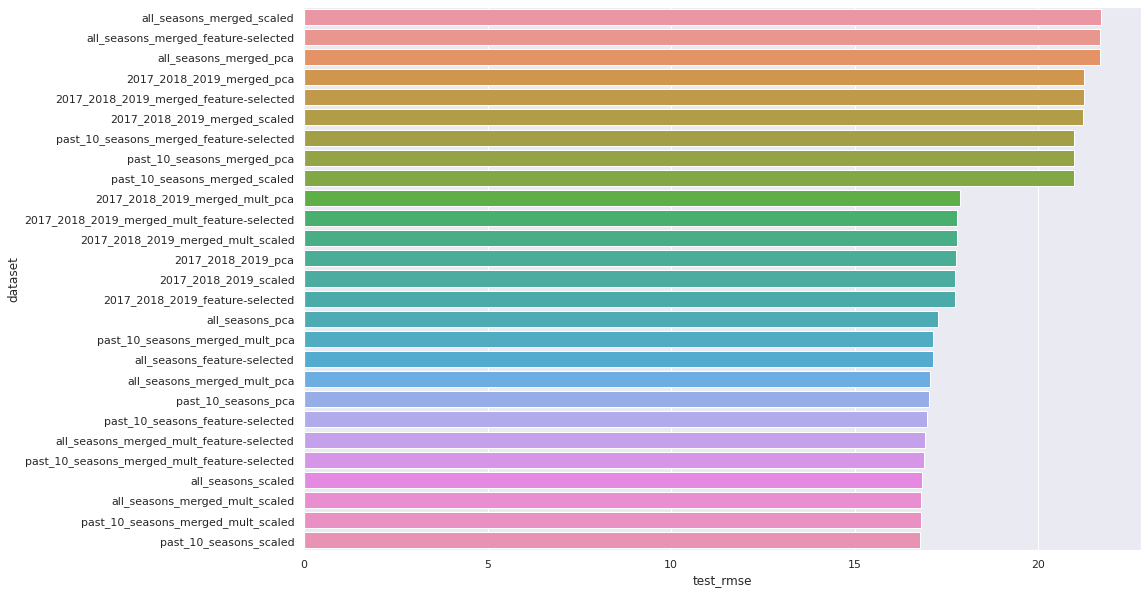

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))
data = filter_by_column(results_v1, 'model', 'ridge').sort_values(by=['test_rmse'], ascending=False)
sns.barplot(y="dataset", x="test_rmse", orient='h', data=data, ax=ax, dodge=True)

# Comparing Datasets Across Ridge Regression (R^2)

<AxesSubplot:xlabel='test_r_2', ylabel='dataset'>

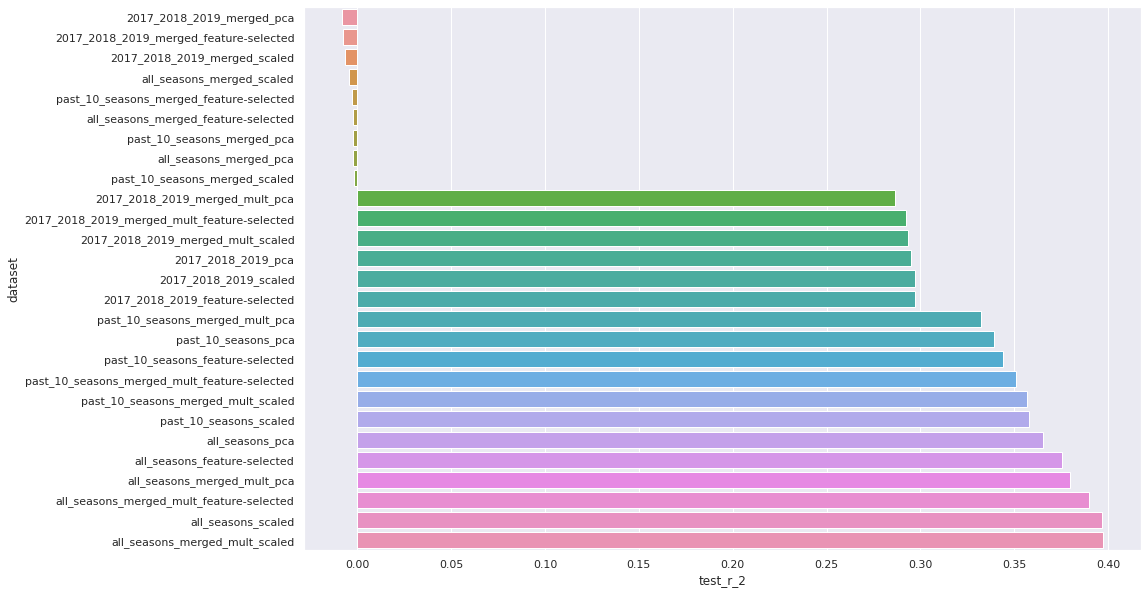

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
data = filter_by_column(results_v1, 'model', 'ridge').sort_values(by=['test_r_2'])
sns.barplot(y="dataset", x="test_r_2", orient='h', data=data, ax=ax, dodge=True)

# The Effect of Merging by Difference

<AxesSubplot:xlabel='dataset', ylabel='test_r_2'>

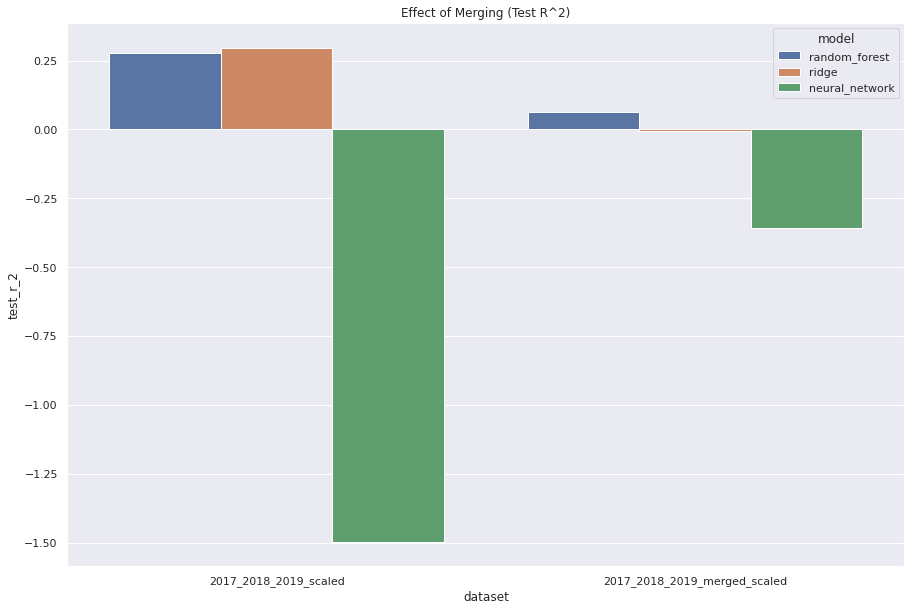

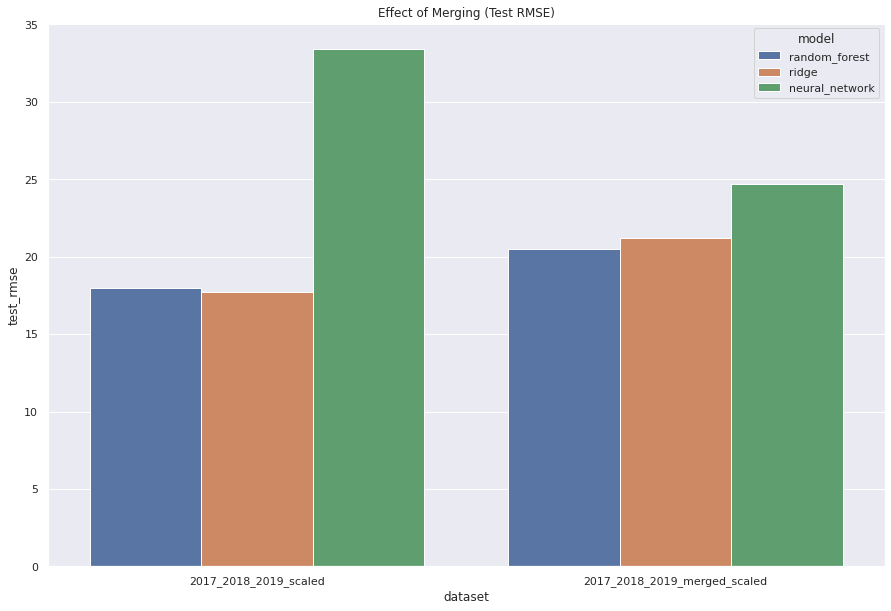

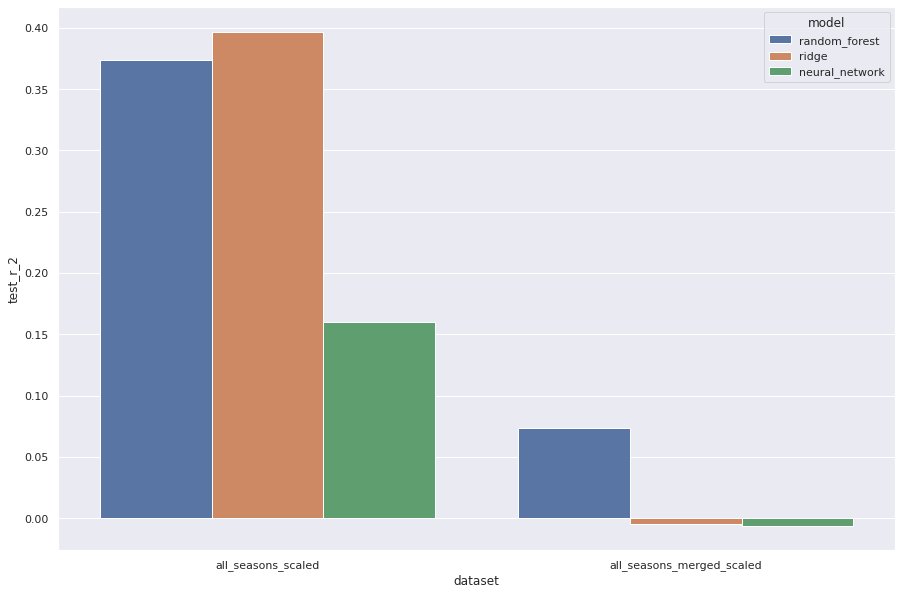

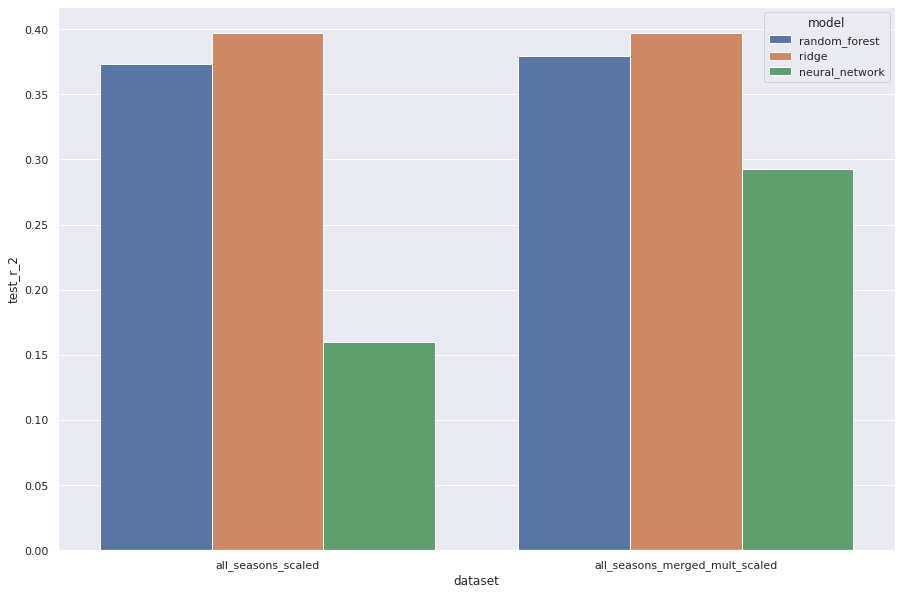

In [14]:
# diff merge
data = pd.concat([filter_to_dataset(results_v1, "all_seasons_scaled"), filter_to_dataset(results_v1, "all_seasons_merged_scaled")])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="dataset", y="test_r_2", hue="model", data=data, ax=ax, dodge=True)

# mult merge
data = pd.concat([filter_to_dataset(results_v1, "all_seasons_scaled"), filter_to_dataset(results_v1, "all_seasons_merged_mult_scaled")])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="dataset", y="test_r_2", hue="model", data=data, ax=ax, dodge=True)

# Feature Selection and PCA (R^2)

<AxesSubplot:xlabel='dataset', ylabel='test_r_2'>

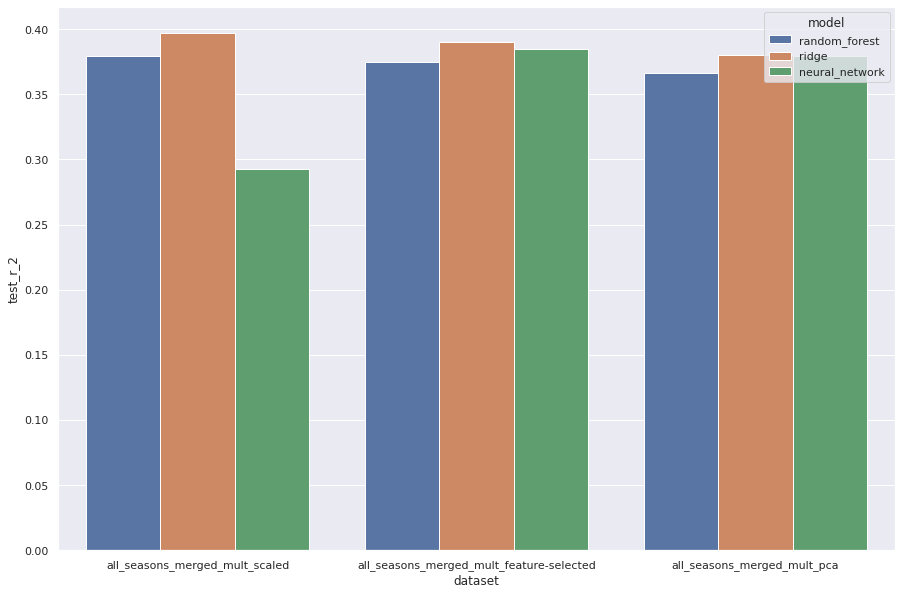

In [14]:
data = pd.concat([filter_to_dataset(results_v1, "all_seasons_merged_mult_")])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="dataset", y="test_r_2", hue="model", data=data, ax=ax, dodge=True)

# Feature Selection and PCA (RMSE)

<AxesSubplot:xlabel='dataset', ylabel='test_rmse'>

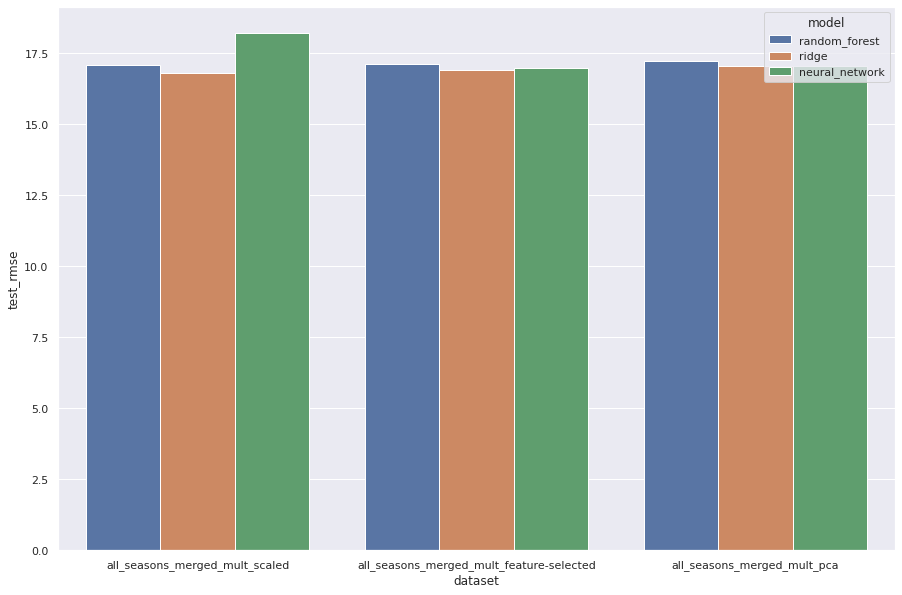

In [15]:
data = pd.concat([filter_to_dataset(results_v1, "all_seasons_merged_mult_")])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="dataset", y="test_rmse", hue="model", data=data, ax=ax, dodge=True)

# Look at the error relative to the truth value
The goal of this is to find a small range of values the model predicts well. We might want to pursue this range for our categorical model

In the end, little usable information because if we were just predicting the mean, the output would look something like this as well

Index(['truth', 'error'], dtype='object')


<AxesSubplot:xlabel='truth', ylabel='error'>

<AxesSubplot:xlabel='truth', ylabel='error'>

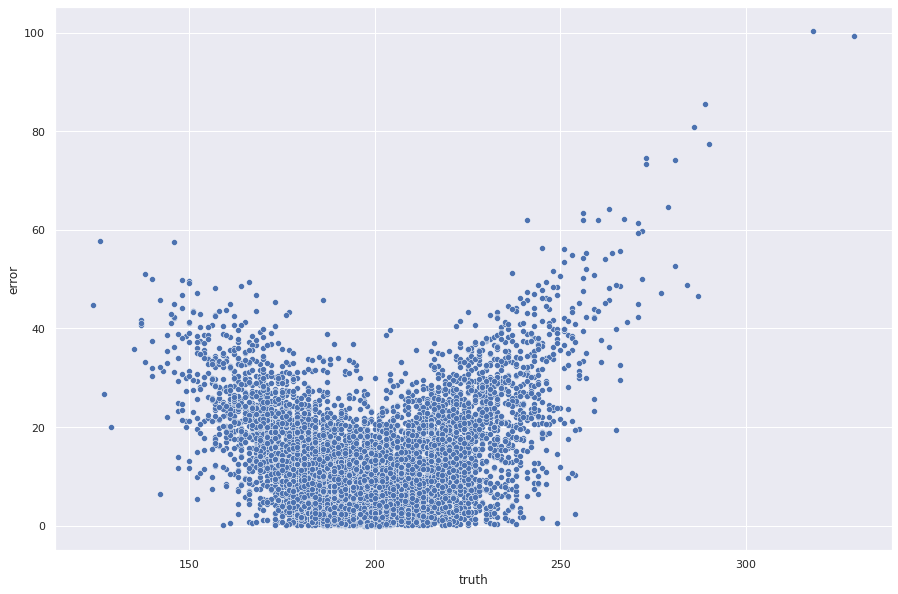

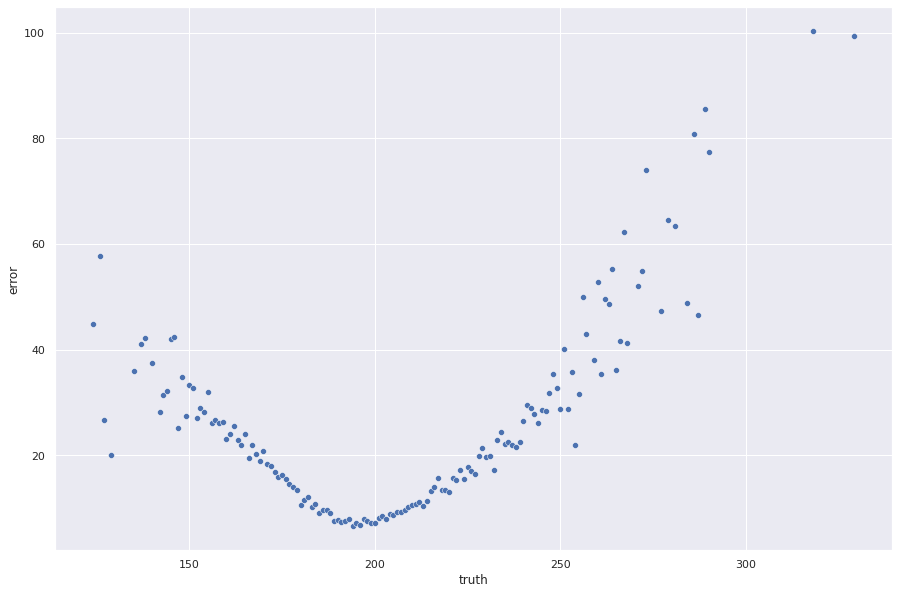

In [48]:
def get_truth_error_df(results, model):
    truth_series = results['truth']
    error_series = (truth_series - results[model]).abs().rename('error')
    return pd.concat([truth_series, error_series], axis=1)
model = 'ridge_regression'
fig, ax = plt.subplots(figsize=(15, 10))
truth_error_df = get_truth_error_df(predictions_v1, model)
print(truth_error_df.columns)
display(sns.scatterplot(x='truth', y='error', data=truth_error_df, ax=ax))

def get_average_error(truth_error_df):
    truth_series = truth_error_df['truth'].to_numpy()
    unique_values = np.unique(truth_series)
    
    truth_and_mean_errors = []
    for unique_truth_value in unique_values:
        error_values = truth_error_df[truth_error_df['truth'] == unique_truth_value]['error']
        mean_error = np.mean(error_values.to_numpy())
        truth_and_mean_errors.append([unique_truth_value, mean_error])
    return pd.DataFrame(data=truth_and_mean_errors, columns=['truth', 'error'])
fig, ax = plt.subplots(figsize=(15, 10))
truth_and_mean_error = get_average_error(truth_error_df)
display(sns.scatterplot(x='truth', y='error', data=truth_and_mean_error, ax=ax))
